In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import joblib

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set Up

In [5]:
output_directory = "outputs"
os.makedirs(output_directory, exist_ok=True)

# Load Data

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# 0 for no diabetes
# 1 for yes diabetes
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Classification

In [9]:
X = df.drop('Outcome', axis=1)   # axis=0 for row, axis=1 for column
y = df['Outcome']

# split data to 80:20 ratio for train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=y)

In [10]:
clf = DecisionTreeClassifier(random_state=0)

In [11]:
model = clf.fit(X_train, y_train)

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

# Results

## Confusion Matrix

In [14]:
confusion_matrix(y_test, y_pred)

array([[85, 15],
       [31, 23]])

## Accuracy Score

In [15]:
accuracy_score(y_test, y_pred)

0.7012987012987013

## ROC Curve

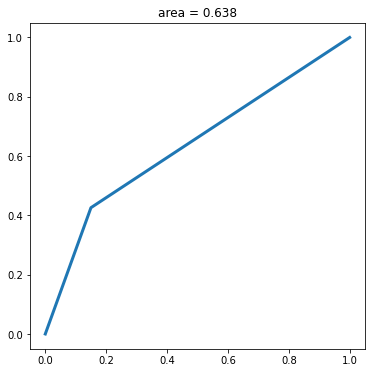

In [16]:
fig, ax = plt.subplots(figsize=(6,6))

y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

ax.plot(fpr, tpr, lw=3)
ax.set_title("area = {0:0.3f}".format(auc(fpr, tpr)))

plt.show()

# Save Model to Disk

In [17]:
joblib.dump(model, os.path.join(output_directory, "model.pickle"))

['outputs/model.pickle']